# Capstone Project: Stroke Risk Prediction - Exploratory Data Analysis #
This is a capstone project for Springboard's data science intensive track. The dataset used in this project is sourced from the data science competition sponsor by McKinsey analytics and held in a platform "Analytics Vidhya". 
The competition link can be found here [contest page] (https://datahack.analyticsvidhya.com/contest/mckinsey-analytics-online-hackathon/).

**Problem Statement:** a chain of hospitals in US collected anonymized pool of patients data for stroke classification. Stroke is one of critical disease which affects nearly 1 in 20 Americans and is a disease that affects arteries leading to and within the brain. A stroke occurs when a blood vessel that carries oxygen and nutrients to the brain is either blocked by a clot or ruptures. When that happens part of the brain cannot get the blood (and oxygen) it needs, so the brain cells in the affected region is dead. The clients captured several lifestyle, health monitoring measurements and demographic factors about their anonymized patients. These include features like age, gender, health monitoring measurements (i.e., glucose level, body mass index) and lifestyle factors (i.e., smoking status, occupation type etc.). 

**Stakeholders:**
Hospital cardiac unit managers, a group of clinicians, insurance companies and employers from patient population.

## Part A. Import Cleaned Dataset ##

In [1]:
# Import all libraries #
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Authorization #
__author__ = "Taesun Yoo"
__email__ = "yoots1988@gmail.com"

In [2]:
# --- 2. Write Out List of Functions --- #
#################################
# Part 2 - Discover the Problem #
#################################
# Write a group of funtions:
def load_file(file):
    '''load input CSVs as a dataframe'''
    return pd.read_csv(file)

def clean_data(raw_df):
    '''remove rows that contain invalid data or duplicate IDs'''
    clean_df = raw_df.drop_duplicates(subset='id')
    return clean_df

def EDA_missing_data(cleaned_df):
    '''Performs missing % on each column '''
    missing_df = cleaned_df.isnull().sum()
    missing_df = pd.DataFrame(missing_df, columns=['count'])
    missing_df['pct'] = missing_df['count']/len(cleaned_df)
    missing_df = missing_df.sort_values(by='pct', ascending=False)
    return missing_df

def EDA_numerical_data(cleaned_df):
    '''Computes summary statistics on numerical data'''
    summary_df_num = cleaned_df.describe(include='all').T
    summary_df_num = pd.DataFrame(summary_df_num)[['count', 'std', 'min', 'mean', 'max', '25%', '50%', '75%']]
    return summary_df_num

def EDA_categorical_data(cleaned_df):
    '''Computes summary statitics on categorical data'''
    summary_df_cat = cleaned_df.describe(include=['O'])
    summary_df_cat = pd.DataFrame(summary_df_cat)
    return summary_df_cat
    
def EDA_pivot_table(cleaned_df, cat_var, num_var):
    '''Creates a pivot table based on categorical var and average numerical var'''
    pivot_cat_df = cleaned_df.pivot_table(index=cat_var, values=num_var, aggfunc=np.mean)
    pivot_cat_df.reset_index(level=0, inplace=True)
    pivot_cat_df.rename(columns={cat_var:cat_var, num_var:"avg" + "_" + num_var + "_" + cat_var}, inplace=True)
    return pivot_cat_df

def EDA_plot_num_var(df, num_var):
    '''plot a boxplot and distribution plot for numerical variable'''
    plt.figure(figsize=(14,7))
    plt.subplot(1,2,1)
    sns.boxplot(df[num_var])
    plt.subplot(1,2,2)
    sns.distplot(df[num_var], bins=20)
    plt.show()
    
def EDA_plot_mean_label_barchart(df, num_var1, num_var2, num_var3,
                                 label, lab_list, lab_name):
    '''plot 1 by 3 average numerical bar charts categorized by stroke labels'''
    plt.figure(figsize=(10,7))
    plt.subplots_adjust(hspace=1.3, wspace=1.3)
    # 1st plot factored by a stroke label:
    plt.subplot(1,3,1)
    df.groupby(label)[num_var1].mean().sort_values(ascending=False).plot(kind='bar')
    plt.xticks(lab_list, lab_name, rotation=0, fontsize=12)
    plt.xlabel('stroke conditions')
    plt.ylabel('Mean ' + num_var1)
    plt.title('Mean ' + num_var1 + ' by stroke conditions', fontsize=12)
    # 1st plot factored by a stroke label:
    plt.subplot(1,3,2)
    df.groupby(label)[num_var2].mean().sort_values(ascending=False).plot(kind='bar')
    plt.xticks(lab_list, lab_name, rotation=0, fontsize=12)
    plt.xlabel('stroke conditions')
    plt.ylabel('Mean ' + num_var2)
    plt.title('Mean ' + num_var2 + ' by stroke conditions', fontsize=12)
    # 1st plot factored by a stroke label:
    plt.subplot(1,3,3)
    df.groupby(label)[num_var3].mean().sort_values(ascending=False).plot(kind='bar')
    plt.xticks(lab_list, lab_name, rotation=0, fontsize=12)
    plt.xlabel('stroke conditions')
    plt.ylabel('Mean ' + num_var3)
    plt.title('Mean ' + num_var3 + ' by stroke conditions', fontsize=12)

def EDA_plot_mean_cat_barchart(df, num_var, cat_var1, cat_var2, cat_var3, cat_var4):
    '''plot 2 by 2 average numerical bar charts categorized by categorical variables'''
    plt.figure(figsize=(10,10))
    plt.subplots_adjust(hspace=1, wspace=1.2)
    # 1st plot
    plt.subplot(2,2,1)
    df.groupby(cat_var1)[num_var].mean().sort_values(ascending=False).plot(kind='bar')
    plt.xlabel(cat_var1)
    plt.ylabel('Mean ' + num_var)
    plt.title('Mean ' + num_var + ' stroke patients by '+ cat_var1)
    # 2nd plot
    plt.subplot(2,2,2)
    df.groupby(cat_var2)[num_var].mean().sort_values(ascending=False).plot(kind='bar')
    plt.xlabel(cat_var2)
    plt.ylabel('Mean ' + num_var)
    plt.title('Mean ' + num_var + ' stroke patients by '+ cat_var2)
    # 3rd plot
    plt.subplot(2,2,3)
    df.groupby(cat_var3)[num_var].mean().sort_values(ascending=False).plot(kind='bar')
    plt.xlabel(cat_var3)
    plt.ylabel('Mean ' + num_var)
    plt.title('Mean ' + num_var + ' stroke patients by '+ cat_var3)
    # 4th plot
    plt.subplot(2,2,4)
    df.groupby(cat_var4)[num_var].mean().sort_values(ascending=False).plot(kind='bar')
    plt.xlabel(cat_var4)
    plt.ylabel('Mean ' + num_var)
    plt.title('Mean ' + num_var + ' stroke patients by '+ cat_var4)    
    
def EDA_plot_hist_label(df, num_var, cat_var, bins, lab_list):
    '''split dataframe by category and plot a histogram'''
    for i in lab_list:
        df_by_label = df[num_var][df[cat_var] == i]
        plt.hist(df_by_label, bins=bins, label=i)
        plt.title('Histogram of ' + str(num_var))
        plt.xlabel(str(num_var))
        plt.ylabel('# of patients')                   

def EDA_plot_hist_3by1(df, 
                       var1, bin1, lab1, 
                       var2, bin2, lab2, 
                       var3, bin3, lab3,
                       factor=None):
    '''Print skewness and plot the histogram'''
    plt.figure(figsize=(8,8))
    plt.subplots_adjust(hspace=1/2, wspace=1/2)
    #subplot 1:
    print("Skewness is:" + lab1, df[var1].skew())
    plt.subplot(3,1,1)
    plt.hist(df[var1]*factor, color='green', bins=bin1)
    plt.title('Histogram of '+ lab1)
    plt.xlabel(lab1)
    plt.ylabel('# of patients')
    #subplot 2:
    print("Skewness is:" + lab2, df[var2].skew())
    plt.subplot(3,1,2)
    plt.hist(df[var2]*factor, color='blue', bins=bin2)
    plt.title('Histogram of '+ lab2)
    plt.xlabel(lab2)
    plt.ylabel('# of patients')
    #subplot 3:
    print("Skewness is:" + lab3, df[var3].skew())
    plt.subplot(3,1,3)
    plt.hist(df[var3]*factor, color='cyan', bins=bin3)
    plt.title('Histogram of '+ lab3)
    plt.xlabel(lab3)
    plt.ylabel('# of patients')

def split_data_by_label(df, label):
    '''set label as an index and split dataframe by an index'''
    df_label = df.set_index(label)
    df_label_1, df_label_0 = df_label.loc[1], df_label.loc[0]
    return (df_label_1, df_label_0)

def split_groupby_data(df,label,cat_var):
    '''Grouped dataframe using a label and categorical varialbe
        then split a dataframe by label(s)'''
    df_grp = pd.DataFrame(df.groupby([label,cat_var])[cat_var].count())
    df_grp.columns = ['count']
    df_grp_0 = df_grp.loc[0]
    df_grp_1 = df_grp.loc[1]
    return(df_grp_0, df_grp_1)

def plot_pie_charts(df_grp_0, df_grp_1, label, var_name, color):
    '''Plot a set of pie charts for non-stroke/stroke cases'''
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    # subplot for non-stroke:
    ax1.pie(df_grp_0, colors=color, autopct='%.0f%%',
            wedgeprops={'edgecolor':'white'}, textprops={'fontsize':14})
    ax1.set_title('Non-stroke patients ' + var_name, fontsize=13)
    ax1.legend(labels = label, loc='upper right')
    # subplot for stroke:
    ax2.pie(df_grp_1, colors=color, autopct='%.0f%%',
            wedgeprops={'edgecolor':'white'}, textprops={'fontsize':14})
    ax2.set_title('Stroke patients ' + var_name, fontsize=13)
    ax2.legend(labels = label, loc='upper right')
    
def EDA_plot_freq_chart(df, cat_var, var_name):
    '''computes frequency count chart'''
    cat_var_count = df[cat_var].value_counts()
    sns.barplot(cat_var_count.index, cat_var_count.values, alpha=0.9)
    plt.title('Frequency Counts of '+ var_name)
    plt.ylabel('Counts')
    plt.xlabel(var_name, fontsize=10)
    plt.xticks(rotation=270)
    plt.show()

def EDA_plot_bar(cleaned_df, cat_var, num_var, color):
    '''Plots the bar chart'''
    cleaned_df.plot.bar(color=color)
    plt.xlabel(cat_var)
    plt.ylabel('Avg. ' + num_var)
    plt.xticks(rotation=0)
    plt.show()    

def EDA_plot_box_whisker(df, num_var, cat_var, hue=None):
    '''plot the box-whisker plot'''
    df.sort_values(by=[num_var, cat_var], ascending=False, inplace=True)
    plt.figure()
    sns.set(style='whitegrid')
    sns.boxplot(cat_var, num_var, hue, df)
    plt.title('Box Plot of '+ num_var + ' by '+ cat_var)
    plt.xticks(rotation=270, fontsize=9)

def EDA_convert_object_to_cat(df):
    '''convert data type object to category'''
    for col in df.columns:
        if df[col].dtype.name == "object":
            df[col] = df[col].astype('category')

def EDA_encode_cat_var(df, col, num_var):
    '''encode the categorical variables using a specified numerical variable for each category '''
    cat_dict={}
    cats = df[col].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat] = df[df[col] == cat][num_var].mean()
    df[col] = df[col].map(cat_dict)

def EDA_plot_corr_matrix(df, features, label):
    '''plot the correlation matrix'''
    corr = df[features + label].corr()
    # Create a mask:
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    plt.figure(figsize=(12,10))
    sns.heatmap(corr,
                cmap=sns.diverging_palette(220, 10, as_cmap=True),
                annot=True, fmt=".2f", mask=mask)
    plt.xticks(rotation=90)
    plt.show()

def EDA_plot_crosstab(df, cat_var1, cat_var2):
    '''plot a cross-tabulate on two categorical variables'''
    cross_tab = pd.crosstab(df[cat_var1], df[cat_var2])
    return cross_tab

def EDA_plot_scatter(df, 
                     var1, lab1, c1,
                     var2, lab2, c2, 
                     factor=None):
    '''plot 2 by 1 scatter plots'''
    plt.figure(figsize=(8,8))
    plt.subplots_adjust(hspace=0.4, wspace=0.9)
    plt.subplot(2,1,1)
    plt.scatter(df[var1]*factor, df['age'], color=c1)
    plt.title('Relationship between ' + lab1 + ' and Age')
    plt.xlabel(lab1)
    plt.ylabel('Age')

    plt.subplot(2,1,2)
    plt.scatter(df[var2]*factor, df['age'], color=c2)
    plt.title('Relationship between '+ lab2 + ' and Age')
    plt.xlabel(lab2)
    plt.ylabel('Age')
    
def Pearson_r(df, x, y):
    '''compute Pearson r correlation'''
    corr_mat = np.corrcoef(df[x],df[y])
    return corr_mat[0, 1]

def EDA_plot_pair_linreg(df_0, df_1, num_var1, num_var2, 
                         r_0, r_1, lab0, lab1):
    '''plot a pair of linear regressions'''
    plt.figure(figsize=(10,5))
    plt.subplots_adjust(wspace=0.7)
    # plot 1:
    plt.subplot(1,2,1)
    plt.plot(df_1[num_var1], df_1[num_var2], 'r--', label='r =%.2f' % r_1,
             marker='.', linestyle='none', color='red')
    plt.margins(0.02)
    plt.legend(loc='upper left')
    plt.xlabel(num_var1)
    plt.ylabel(num_var2)
    plt.title(num_var1 + ' vs. ' + num_var2 + ' by ' + lab1)
    # Fit linear regression:
    a,b = np.polyfit(df_1[num_var1], df_1[num_var2], 1)
    x = np.array([0, 84])
    y = a*x + b
    plt.plot(x,y)
    
    # plot 2:
    plt.subplot(1,2,2)
    plt.plot(df_0[num_var1], df_0[num_var2], 'g--', label='r =%.2f' % r_0,
             marker='.', linestyle='none', color='green')
    plt.margins(0.02)
    plt.legend(loc='upper left')
    plt.xlabel(num_var1)
    plt.ylabel(num_var2)
    plt.title(num_var1 + ' vs. ' + num_var2 + ' by ' + lab0)
    # Fit linear regression:
    a,b = np.polyfit(df_0[num_var1], df_0[num_var2], 1)
    x = np.array([0, 84])
    y = a*x + b
    plt.plot(x,y)
    
def EDA_plot_multi_facet_scatter(df1, df2, 
                                 var1, lab1, 
                                 var2, lab2,
                                 response, factor):
    '''plot multi-faceted scatter plot by county class'''
    f, (ax1, ax2)=plt.subplots(1, 2, sharey=True, figsize=(8,4))
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.tight_layout(pad=0.4, w_pad=1.5, h_pad=1.0)
    ax1.scatter(df1[var1]*factor, df1[response], label='Nonmetro', edgecolor='w')
    ax1.scatter(df2[var1]*factor, df2[response], label='Metro', edgecolor='w')
    ax1.legend(loc='upper right')
    ax1.set_xlabel(lab1, fontsize=10)
    ax1.set_ylabel(response, fontsize=10)
    ax1.grid(False)
    
    ax2.scatter(df1[var2]*factor, df1[response], label='Nonmetro', edgecolor='w')
    ax2.scatter(df2[var2]*factor, df2[response], label='Metro', edgecolor='w')
    ax2.legend(loc='upper right')
    ax2.set_xlabel(lab2, fontsize=10)
    ax2.set_ylabel(response, fontsize=10)
    ax2.grid(False)

def EDA_plot_color_sc_scatter(df, var1, lab1,
                              var2, lab2, response):
    '''plot color scaled scatter plots'''
    # figure 1: subplot 1
    f, (ax1) = plt.subplots(1,1, sharey=True, figsize=(10,6))
    s1 = ax1.scatter(df[var1], df[var2], c=df[response],
                     cmap=plt.cm.coolwarm, edgecolor='w')
    ax1.set_xlabel(lab1, fontsize=14)
    ax1.set_ylabel(lab2, fontsize=14)
    ax1.grid(False)
    # lenged: color bar scaled by confounding factor
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
    cax=plt.axes([0.85, 0.1, 0.05, 0.8])
    cb=f.colorbar(s1, cax=cax)
    cb.set_label(response)

In [3]:
# Define input CSVs:
if __name__ == '__main__':
    eda_file = 'df_eda_stroke.csv'

# Define type of variables list:
#df_eda.select_dtypes(include='object').columns
cat_vars = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
            'work_type', 'Residence_type', 'smoking_status']

#df_eda.select_dtypes(include='int64').columns
#df_eda.select_dtypes(include='float64').columns
num_vars = ['age', 'avg_glucose_level', 'bmi']
label_var = 'stroke'

# Define variable(s) to drop:
list_vars =['id']

# Load data
df_eda = load_file(eda_file)

## Part B. Exploratory Data Analysis ##

**Stroke Patients Data: training set** 

Data exploration is conducted on a cleaned training set. The main goal of this phase is to explore any interesting relationships among features and identify which features are good predictors on stroke label predictions.

Following set of questions are asked:

1. Can I count something interesting?
2. Can I find some trends (increase or decrease and any anomalies)?
3. Can I plot a bar chart or a histogram?
4. Can I make a scatter plot?

These set of guiding questions will help us to explore any insights and tell a compelling story about the Stroke patients dataset.

In [4]:
# compute top 10 rows on a eda_dataframe:
df_eda.head(10)

# check duplicates:
df_eda.duplicated().sum()

#---- Compute % of Missing Data ----#
missing_df = EDA_missing_data(df_eda)
missing_df

,count,pct
gender,0,0.0
age,0,0.0
hypertension,0,0.0
heart_disease,0,0.0
ever_married,0,0.0
work_type,0,0.0
Residence_type,0,0.0
avg_glucose_level,0,0.0
bmi,0,0.0
smoking_status,0,0.0


In [5]:
#---- Compute Summary Statistics: numerical data ----#
summary_df_num = EDA_numerical_data(df_eda[num_vars])
summary_df_num

,count,std,min,mean,max,25%,50%,75%
age,43400.0,22.519649,0.08,42.217894,82.00,24.00,44.00,60.00
avg_glucose_level,43400.0,43.111751,55.00,104.482750,291.05,77.54,91.58,112.07
bmi,43400.0,7.639769,10.10,28.574551,97.60,23.40,27.70,32.60


In [6]:
#---- Compute Summary Statistics: categorical data ----#
summary_df_cat = EDA_categorical_data(df_eda[cat_vars])
summary_df_cat

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status
count,43400,43400,43400,43400,43400,43400,43400
unique,3,2,2,2,5,2,3
top,Female,No,No,Yes,Private,Urban,never smoked
freq,25665,39339,41338,27938,24834,21756,29345


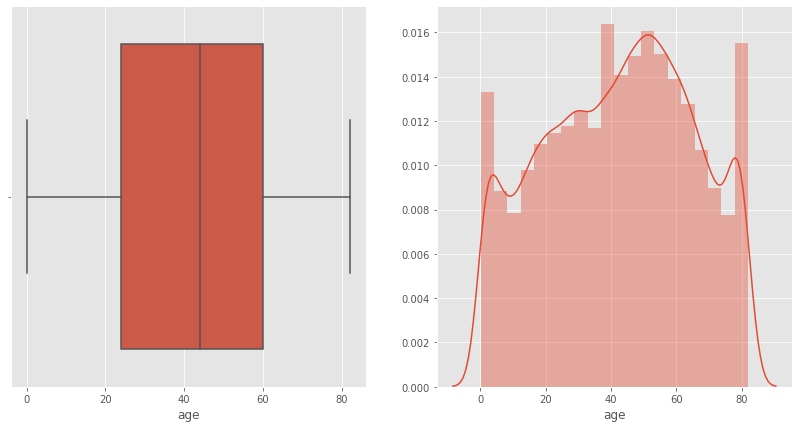

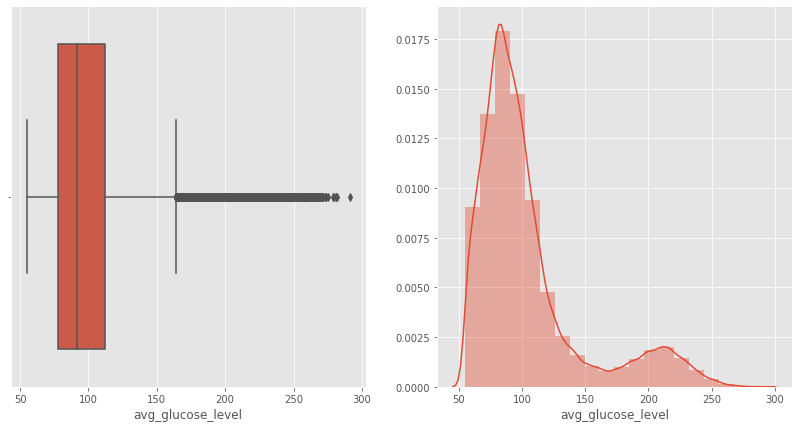

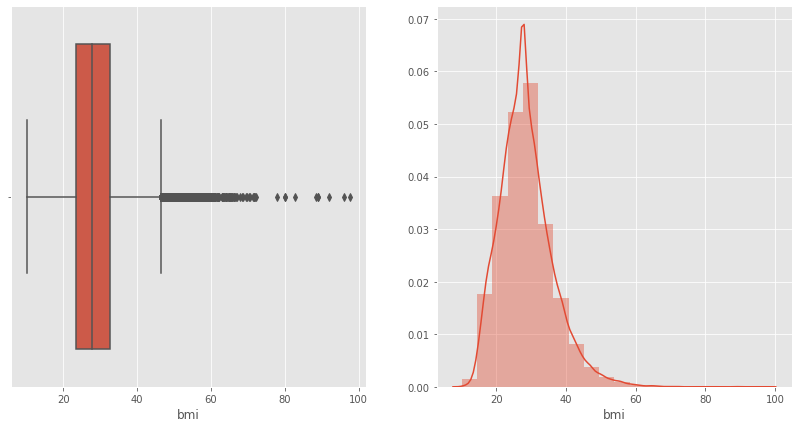

In [7]:
#---- Visualize numerical variable (age) ----#
EDA_plot_num_var(df_eda, 'age')

#---- Visualize numerical variable (avg_glucose_level) ----#
EDA_plot_num_var(df_eda, 'avg_glucose_level')

#---- Visualize numerical variable (bmi) ----#
EDA_plot_num_var(df_eda, 'bmi')

### Summary: Age, avg_glucose_level, bmi

Visualizes the numerical variables. First, the box plot shows that mean of age is somewhere around 15. With a lot of outliers outsides of the UB approx. 32. Second, the histogram shows the distribution of poverty rate is quite close to normal distribution. It seems a little bit right skewed (positive direction).

In [8]:
#--- Use IQR to detect potential outliers ----#
stat = df_eda.avg_glucose_level.describe()
print(stat)
IQR = stat['75%'] - stat['25%'] 
UB = stat['75%'] + 1.5*IQR
LB = stat['25%'] - 1.5*IQR
print('The LB and UB for suspected avg. glucose outliers are {} and {}. '.format(LB, UB))

# Check LB Outeliers:
df_eda[df_eda.avg_glucose_level < 25.745]

# Check UB Outeliers:
df_eda[df_eda.avg_glucose_level > 163.8649]

# check potential outliers by categorical vars:
df_eda.loc[df_eda.avg_glucose_level > 163.8649, 'work_type'].value_counts()
df_eda.loc[df_eda.avg_glucose_level > 163.8649, 'smoking_status'].value_counts()

#--- Check the suspicious outliers by an economic typology: mining-dependent
df_eda[(df_eda.avg_glucose_level > 163.8649) & (df_eda.smoking_status == 'never smoked')]

count    43400.000000
mean       104.482750
std         43.111751
min         55.000000
25%         77.540000
50%         91.580000
75%        112.070000
max        291.050000
Name: avg_glucose_level, dtype: float64
The LB and UB for suspected avg. glucose outliers are 25.745000000000026 and 163.86499999999998. 


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
13,Female,33.0,No,No,Yes,Govt_job,Rural,194.06,40.8,never smoked,0
34,Female,13.0,No,No,No,Private,Rural,195.10,27.6,never smoked,0
38,Male,78.0,No,Yes,Yes,Self-employed,Urban,220.51,31.0,never smoked,0
44,Female,44.0,No,No,Yes,Private,Urban,204.11,23.5,never smoked,0
75,Female,18.0,No,No,No,Private,Urban,172.47,20.2,never smoked,0
77,Female,42.0,Yes,No,Yes,Private,Urban,204.10,43.1,never smoked,0
79,Male,54.0,No,Yes,Yes,Govt_job,Urban,222.46,35.7,never smoked,0
86,Female,65.0,No,No,Yes,Self-employed,Rural,207.12,27.7,never smoked,0
113,Male,69.0,No,No,Yes,Self-employed,Urban,218.98,31.8,never smoked,0
117,Male,57.0,No,No,Yes,Private,Rural,201.22,64.1,never smoked,0


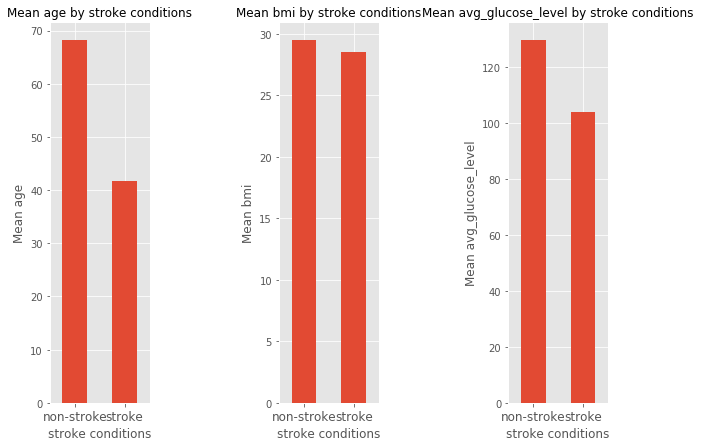

In [9]:
#############################
#---- Plot bar chart(s) ----#
#############################
# split dataframe by label:
df_stroke, df_non_stroke = split_data_by_label(df_eda, 'stroke')

# Create a list of label:
lab_list = list(df_eda['stroke'].unique())                 
lab_name = ['non-stroke', 'stroke']

# mean numeric variables by stroke conditions:    
EDA_plot_mean_label_barchart(df_eda, 'age', 'bmi', 'avg_glucose_level', 
                             'stroke', lab_list, lab_name)

### Summary of Mean Bar Chart(s): Stroke Label(s) ###

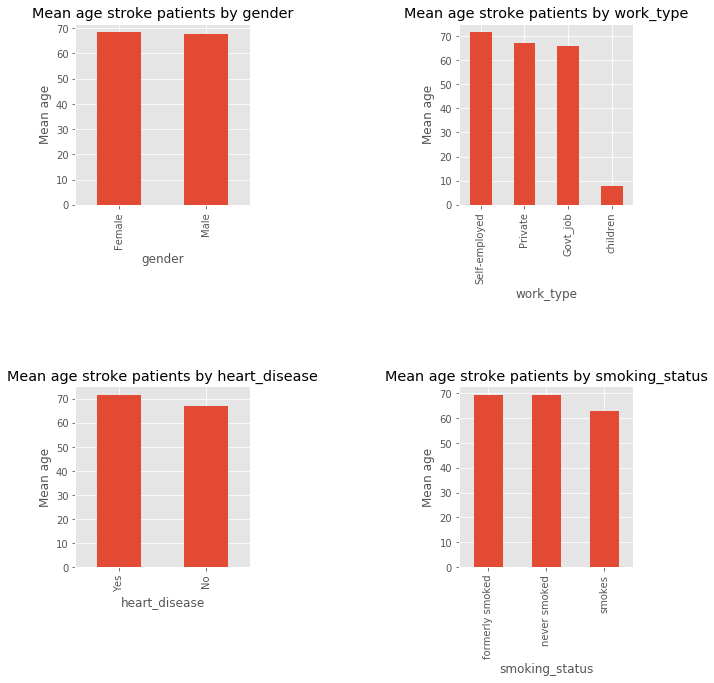

In [10]:
# mean age of stroke patients by categorical factors:    
EDA_plot_mean_cat_barchart(df_stroke, 'age', 'gender', 'work_type', 'heart_disease', 'smoking_status')

### Summary of Mean Bar Chart(s): Categorical Variables ###

C:\Users\yoots\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:167: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
C:\Users\yoots\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:172: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


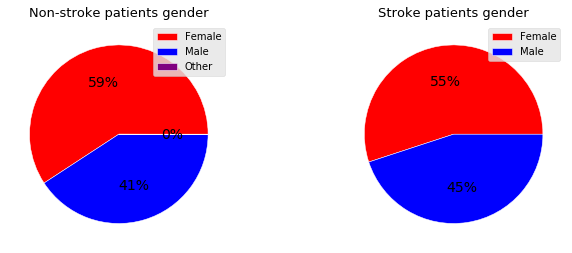

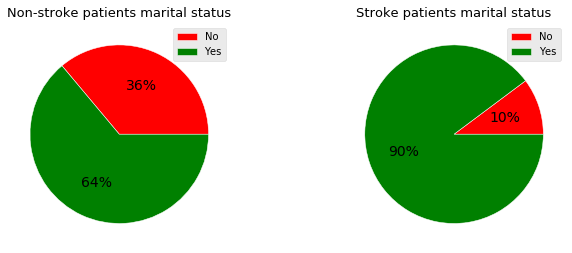

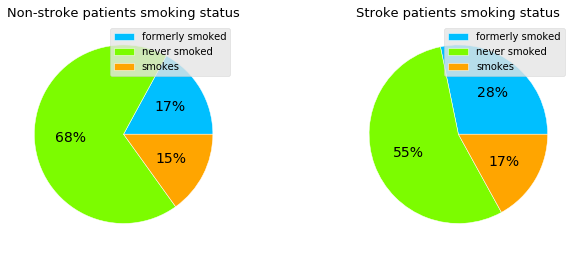

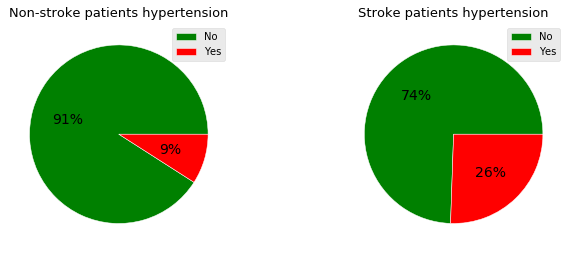

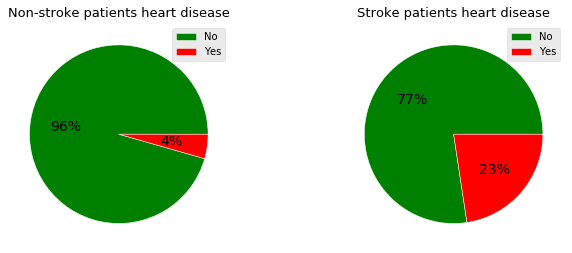

In [11]:
###########################
#---- Plot pie charts ----#
###########################
# Split a groupby dataframe by stroke label: gender
df_grp_gender_0, df_grp_gender_1 = split_groupby_data(df_eda,'stroke','gender')
# Split a groupby dataframe by stroke label: marital_status
df_grp_marital_0, df_grp_marital_1 = split_groupby_data(df_eda,'stroke','ever_married')
# Split a groupby dataframe by stroke label: smoking_status
df_grp_smoking_0, df_grp_smoking_1 = split_groupby_data(df_eda,'stroke','smoking_status')
# Split a groupby dataframe by stroke label: hypertension
df_grp_hypertension_0, df_grp_hypertension_1 = split_groupby_data(df_eda,'stroke','hypertension')
# Split a groupby dataframe by stroke label: heart_disease
df_grp_heart_disease_0, df_grp_heart_disease_1 = split_groupby_data(df_eda,'stroke','heart_disease')

# Plot a set of pie charts: by gender
plot_pie_charts(df_grp_gender_0, df_grp_gender_1, df_grp_gender_0.index,
                'gender', ['red', 'blue', 'purple'])
# Plot a set of pie charts: by marital_status
plot_pie_charts(df_grp_marital_0, df_grp_marital_1, df_grp_marital_0.index,
                'marital status', ['red', 'green'])
# Plot a set of pie charts: by smoking_status
plot_pie_charts(df_grp_smoking_0, df_grp_smoking_1, df_grp_smoking_0.index,
                'smoking status', ['deepskyblue','lawngreen','orange'])
# Plot a set of pie charts: by hypertension
plot_pie_charts(df_grp_hypertension_0, df_grp_hypertension_1, df_grp_hypertension_0.index,
                'hypertension', ['green', 'red'])
# Plot a set of pie charts: by heart_disease
plot_pie_charts(df_grp_heart_disease_0, df_grp_heart_disease_1, df_grp_heart_disease_0.index,
                'heart disease', ['green', 'red'])

### Summary of Pie Chart(s): ###

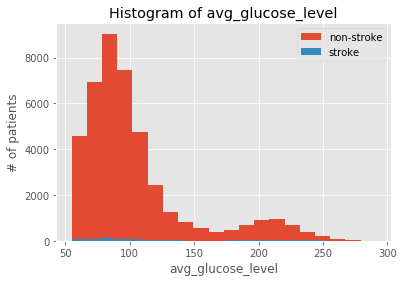

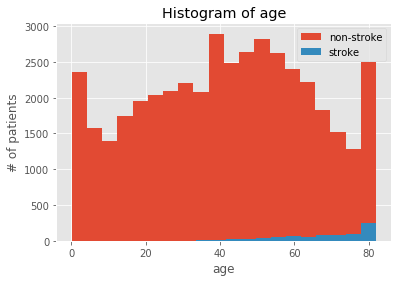

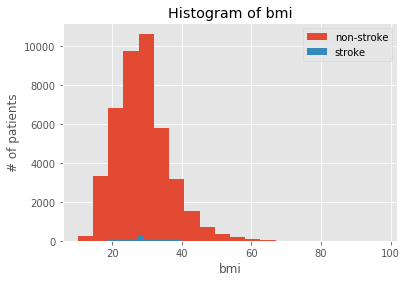

In [12]:
#############################
#---- Plot histograms ----# #
#############################
# Plot multiple histograms on numerical variables by a stroke label:
EDA_plot_hist_label(df_eda, 'avg_glucose_level', 'stroke', 20, lab_list)
plt.legend(('non-stroke','stroke'), loc='upper right')
plt.show()

EDA_plot_hist_label(df_eda, 'age', 'stroke', 20, lab_list)
plt.legend(('non-stroke','stroke'), loc='upper right')
plt.show()

EDA_plot_hist_label(df_eda, 'bmi', 'stroke', 20, lab_list)
plt.legend(('non-stroke','stroke'), loc='upper right')
plt.show()

### Summary: Histogram(s) by Stroke Label(s) ###

Skewness is:Avg. Glucose Level 1.6754049014377774
Skewness is:Body Mass Index 0.9255483805080528
Skewness is:Age -0.10249737146133678


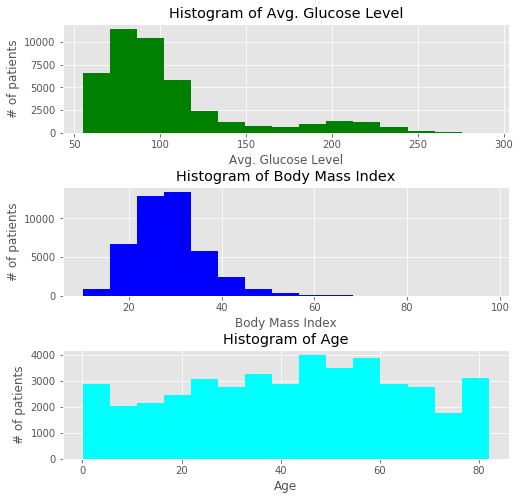

In [13]:
# Plot 3by1 histogram as a subplot: numerical variables
EDA_plot_hist_3by1(df_eda,
                   'avg_glucose_level', 15, 'Avg. Glucose Level',
                   'bmi', 15, 'Body Mass Index',
                   'age', 15, 'Age', 1)
plt.show()

### Summary: Histogram(s) by Numerical Variables ###

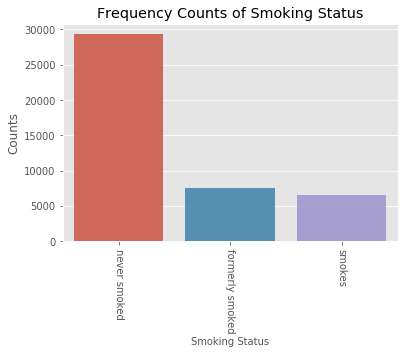

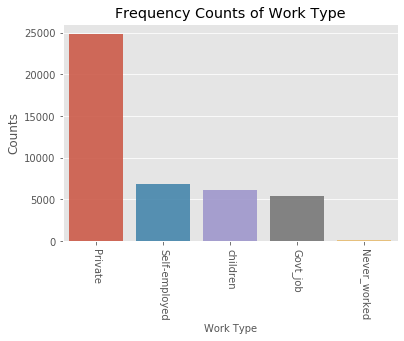

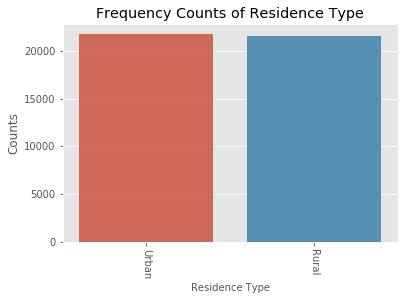

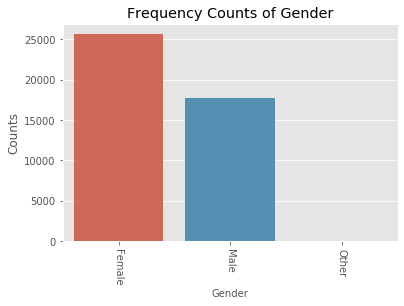

In [14]:
##############################
#---- Plot bar chart(s) ----##
##############################
# Plot bar chart: smoking_status
EDA_plot_freq_chart(df_eda, 'smoking_status', 'Smoking Status')
plt.show()

# Plot bar chart: work_type
EDA_plot_freq_chart(df_eda, 'work_type', 'Work Type')
plt.show()

# Plot bar chart: residence_type
EDA_plot_freq_chart(df_eda, 'Residence_type', 'Residence Type')
plt.show()

# Plot bar chart: gender
EDA_plot_freq_chart(df_eda, 'gender', 'Gender')
plt.show()

### Summary: Frequency Count Plot(s) ###

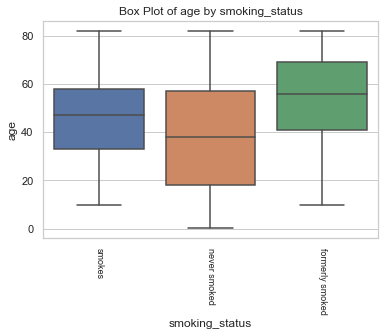

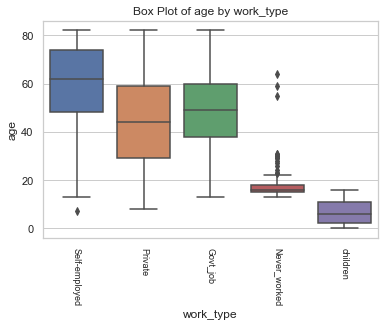

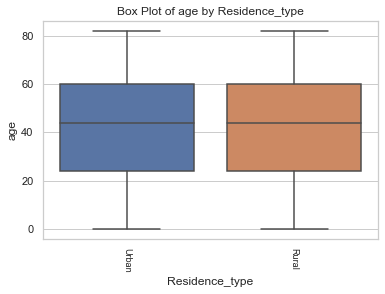

In [15]:
##########################################
#---- Plot box-whisker plot chart(s) ----#
##########################################
# Plot box plot: Smoking Status
EDA_plot_box_whisker(df_eda, 'age', 'smoking_status')
plt.show()
# Plot box plot: Work Type
EDA_plot_box_whisker(df_eda, 'age', 'work_type')
plt.show()
# Plot box plot: Residence Type
EDA_plot_box_whisker(df_eda, 'age', 'Residence_type')
plt.show()

### Summary: Box-Whisker Plot ###

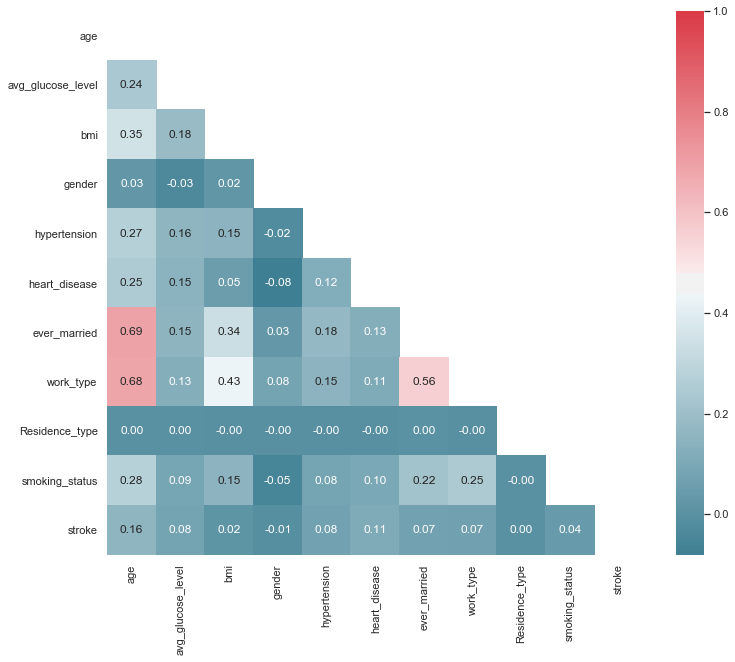

In [16]:
#---- Convert categorical variable data type from object to category ----#
df_eda_cm = df_eda.copy() 
EDA_convert_object_to_cat(df_eda_cm)

#---- Encode categorical variables using avg. numerical variable for each category to replace label ----#
for col in df_eda_cm.columns:
    if df_eda_cm[col].dtype.name == "category":
        EDA_encode_cat_var(df_eda_cm, col, 'age')
        
#---- Plot correlation matrix chart ----#
# Define list of features and salary
features = ['age', 'avg_glucose_level', 'bmi', 'gender',
            'hypertension', 'heart_disease',  'ever_married', 
            'work_type', 'Residence_type',  'smoking_status']
label = ['stroke']

# Plot a correlation matrix:
EDA_plot_corr_matrix(df_eda_cm, features, label)

### Summary: Correlation Matrix Plot ###

In [17]:
###################################
#---- Plot a cross-tabulation ----#    
###################################
EDA_plot_crosstab(df_eda, 'heart_disease', 'hypertension')

hypertension,No,Yes
heart_disease,,
No,37792,3546
Yes,1547,515


In [18]:
EDA_plot_crosstab(df_eda, 'work_type', 'Residence_type')

Residence_type,Rural,Urban
work_type,,
Govt_job,2714,2726
Never_worked,84,93
Private,12320,12514
Self-employed,3444,3349
children,3082,3074


### Summary: Cross-Tablulation ###

0.06305985206922853
0.23266307160472002


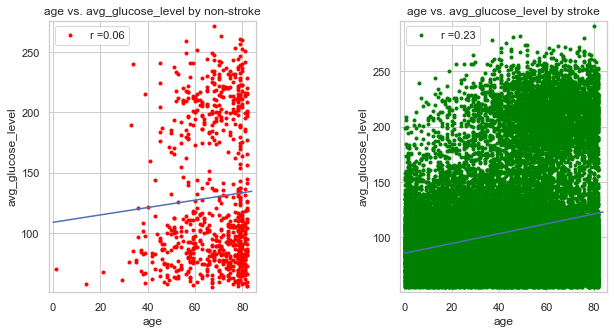

In [19]:
######################################
#---- Linear Regression Analysis ----#
######################################
# Compute correlation coefficient:
# Compute Pearson r for stroke:
r_age_glucose_1 = Pearson_r(df_stroke, 'age', 'avg_glucose_level')
print(r_age_glucose_1) 

# Compute Pearson r for non-stroke:
r_age_glucose_0 = Pearson_r(df_non_stroke, 'age', 'avg_glucose_level')
print(r_age_glucose_0)     

# Plot regression fit a pair of plots by stroke condition(s):
EDA_plot_pair_linreg(df_non_stroke, df_stroke, 'age', 'avg_glucose_level',
                     r_age_glucose_0, r_age_glucose_1, 'stroke', 'non-stroke')
plt.show()

### Summary: Linear Regression Analyses ###

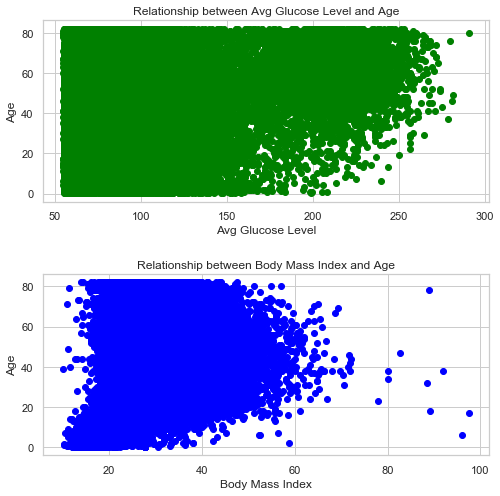

In [20]:
###############################
#---- Plot a scatter plot ----#
###############################
# Demographics
EDA_plot_scatter(df_eda, 
                 'avg_glucose_level', 'Avg Glucose Level', 'green',
                 'bmi', 'Body Mass Index', 'blue', 1)
plt.show()

### Summary: Scatter Plots ###

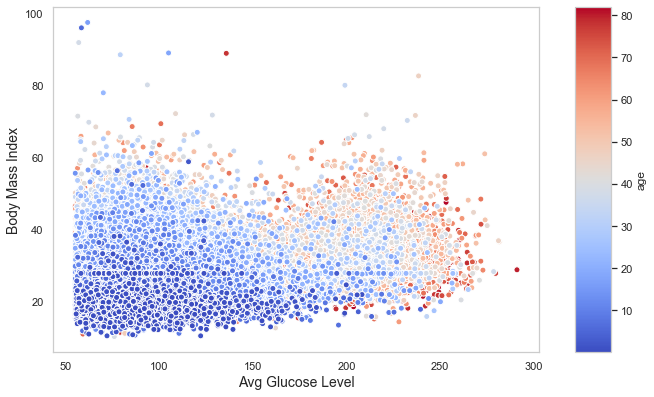

In [21]:
#################################################################
#---- Plot color scaled scatter plots by numerical variable ----#
#################################################################
EDA_plot_color_sc_scatter(df_eda, 'avg_glucose_level','Avg Glucose Level',
                          'bmi', 'Body Mass Index', 'age')
plt.show()

### Summary: Color Scale Scatter Plot ###